In [12]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Function to calculate the counts and ratios for a specific medal or team type
def calculate_cases(data, key_type):
    correct_initial_correct_final = 0
    correct_initial_wrong_final = 0
    wrong_initial_correct_final = 0
    wrong_initial_wrong_final = 0
    total_entries = len(data['data'])

    for entry in data['data']:
        initial_answer = entry['initial_answer']
        final_answer = entry['final_answer']

        # Check correctness for the given type (medal or team)
        initial_correct = initial_answer[f'{key_type}_correct']
        final_correct = final_answer[f'{key_type}_correct']

        # Classify based on correctness
        if initial_correct and final_correct:
            correct_initial_correct_final += 1
        elif initial_correct and not final_correct:
            correct_initial_wrong_final += 1
        elif not initial_correct and final_correct:
            wrong_initial_correct_final += 1
        else:
            wrong_initial_wrong_final += 1

    # Create a confusion matrix-like array
    counts = np.array([[correct_initial_correct_final, wrong_initial_correct_final],
                       [correct_initial_wrong_final, wrong_initial_wrong_final]])

    # Calculate ratios
    ratios = counts / total_entries

    # Combine counts and ratios for display
    labels = np.array([["{0}\n({1:.2%})".format(counts[0, 0], ratios[0, 0]), "{0}\n({1:.2%})".format(counts[0, 1], ratios[0, 1])],
                       ["{0}\n({1:.2%})".format(counts[1, 0], ratios[1, 0]), "{0}\n({1:.2%})".format(counts[1, 1], ratios[1, 1])]])

    return counts, labels

def draw_matrix(model_name):
    medal_file_path = f'./result/answer_medal1_{model_name}.json'
    team_file_path = f'./result/answer_team1_{model_name}.json'
    output_file_path = f'./result/doubt_matrix_{model_name}.png'

    with open(medal_file_path, 'r') as f:
        medal_data = json.load(f)

    with open(team_file_path, 'r') as f:
        team_data = json.load(f)

    # Medal types to analyze
    medal_types = ['gold', 'silver', 'bronze', 'total']
    team_type = 'team'  # Key for the team data

    # Plotting the confusion matrix-like visualization for medals and teams in a 1x5 layout
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # Adjusted for 1x5 layout

    # Processing medals data
    for i, medal_type in enumerate(medal_types):
        counts, labels = calculate_cases(medal_data, medal_type)

        # Create heatmap for medals
        sns.heatmap(counts, annot=labels, fmt="", cmap="Blues", cbar=False,
                    ax=axes[i], xticklabels=['Correct Initial', 'Wrong Initial'], yticklabels=['Correct Final', 'Wrong Final'])

        # Add titles and labels
        axes[i].set_title(f"{medal_type.capitalize()} Medal")
        axes[i].set_xlabel("Initial Response")
        axes[i].set_ylabel("Final Response")

    # Processing team data
    counts, labels = calculate_cases(team_data, team_type)

    # Create heatmap for teams
    sns.heatmap(counts, annot=labels, fmt="", cmap="Blues", cbar=False,
                ax=axes[4], xticklabels=['Correct Initial', 'Wrong Initial'], yticklabels=['Correct Final', 'Wrong Final'])

    # Add titles and labels for team plot
    axes[4].set_title(f"Team")
    axes[4].set_xlabel("Initial Response")
    axes[4].set_ylabel("Final Response")

    # Save the plot
    # Title for total figure
    plt.suptitle(f"Doubt Matrix for {model_name}", fontsize=20)

    plt.savefig(output_file_path)
    plt.show()

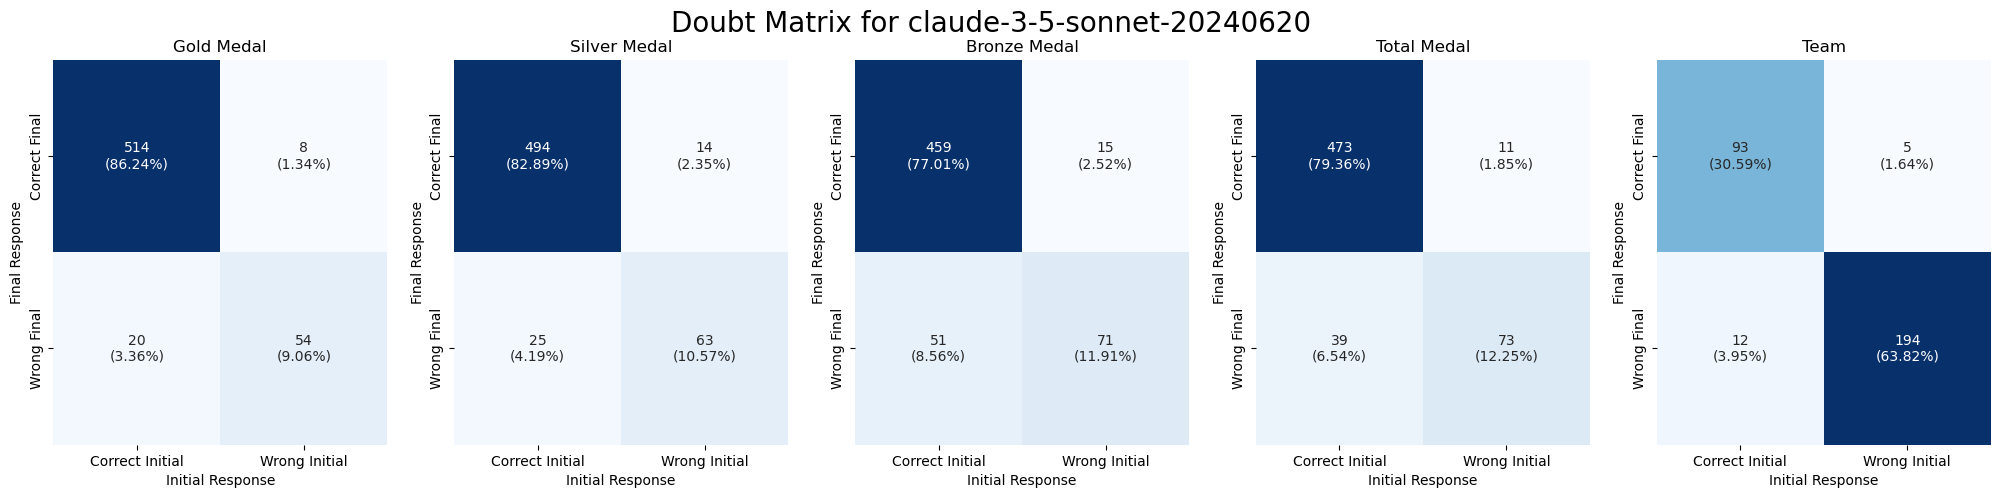

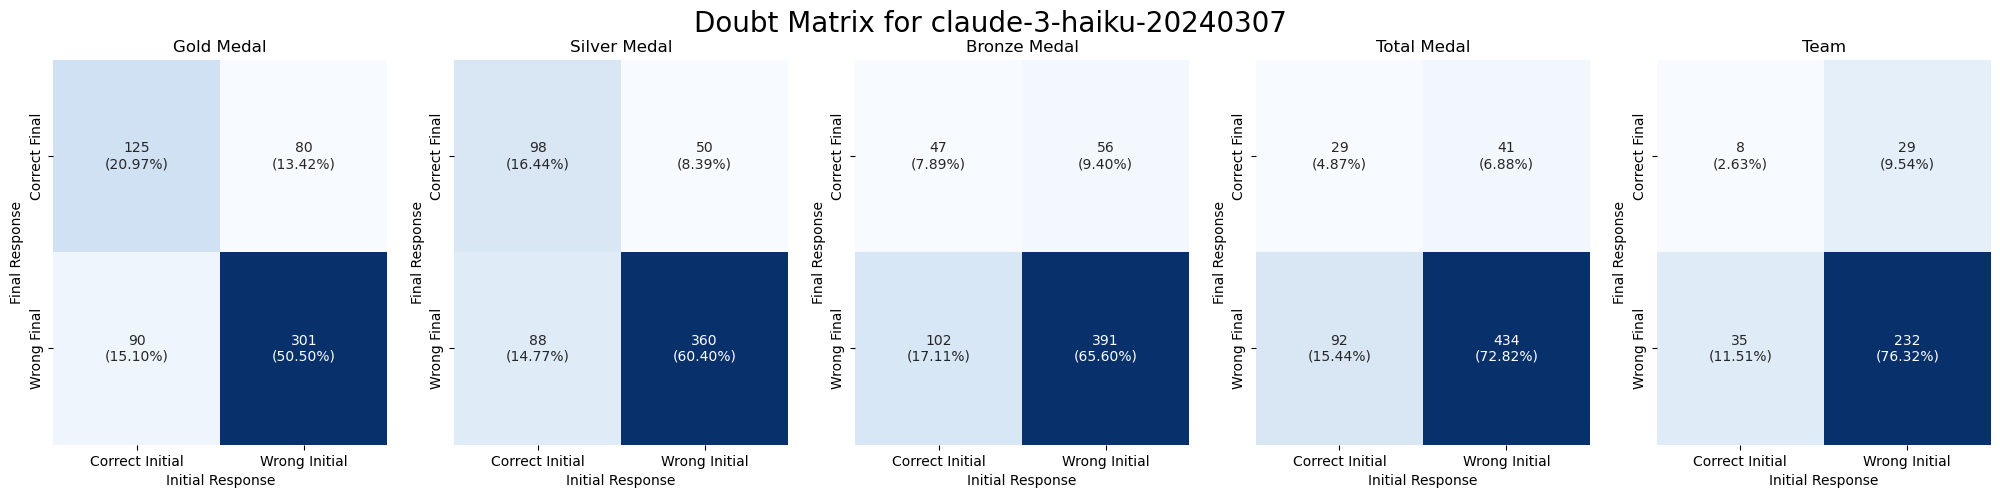

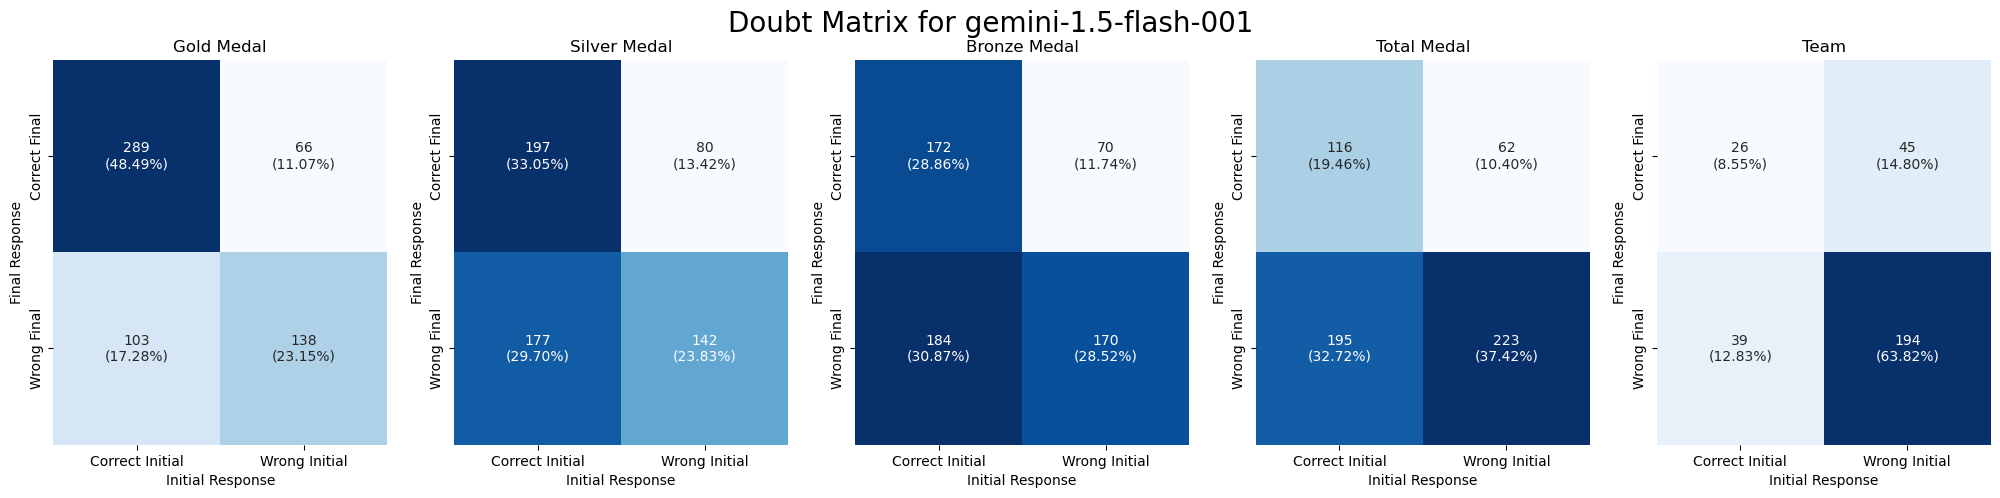

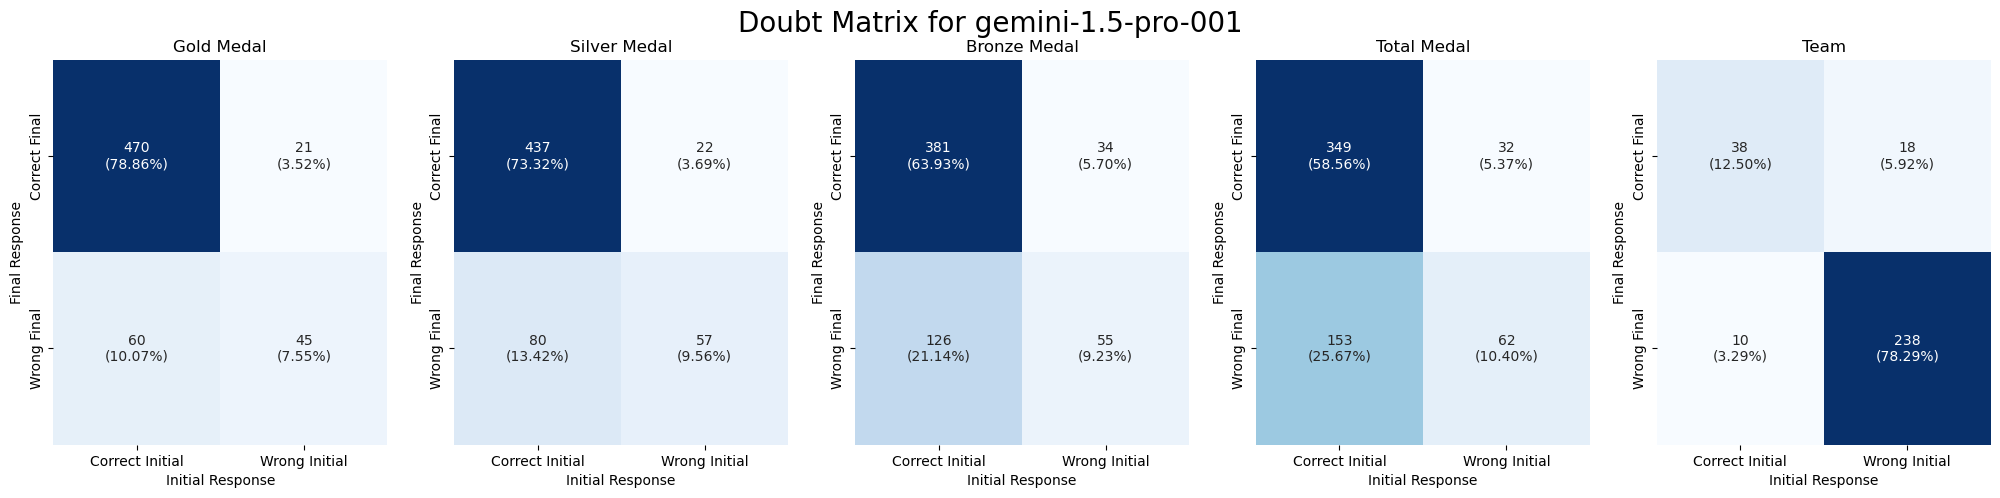

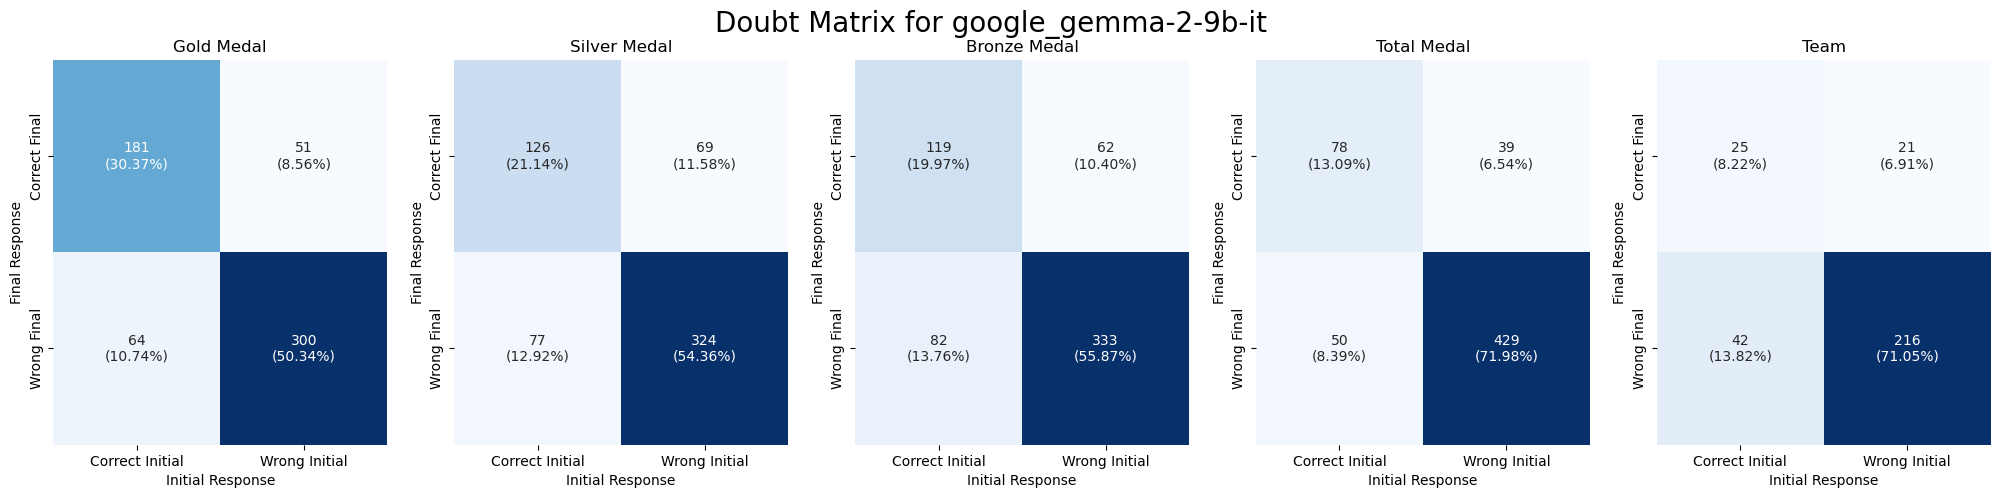

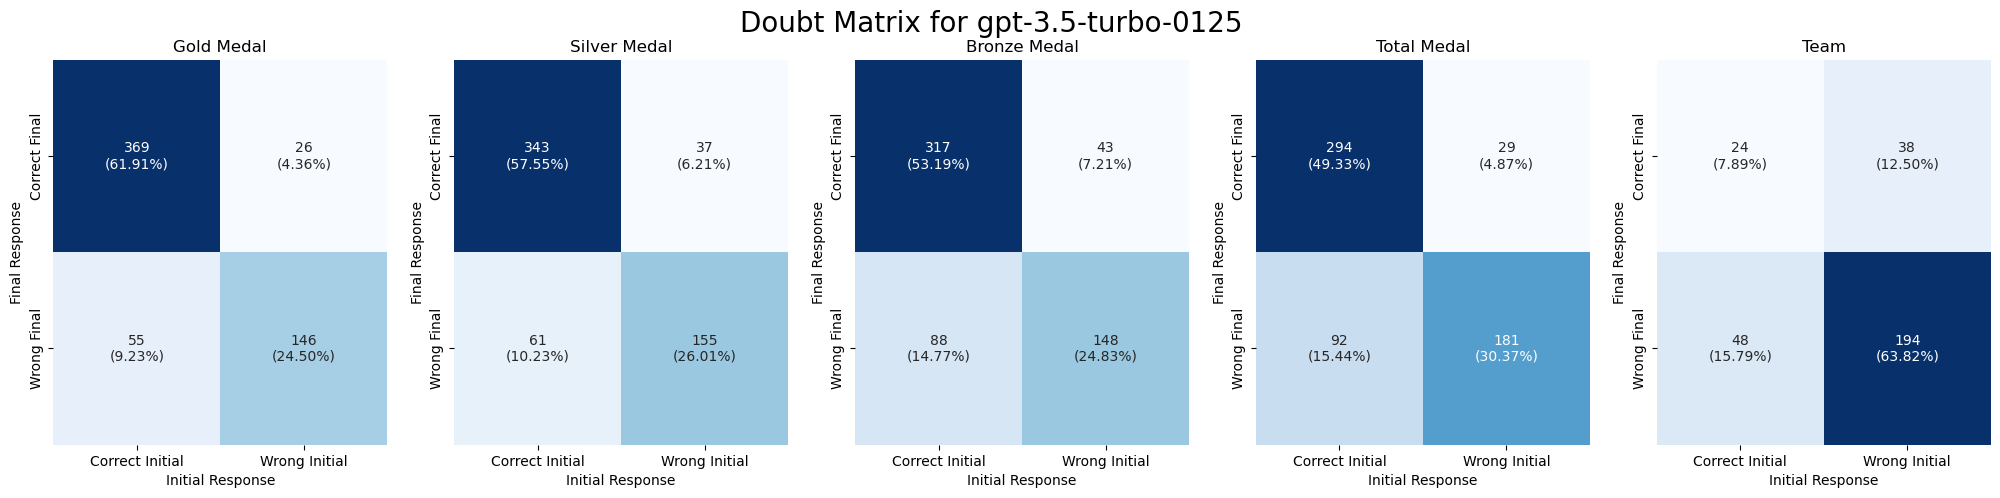

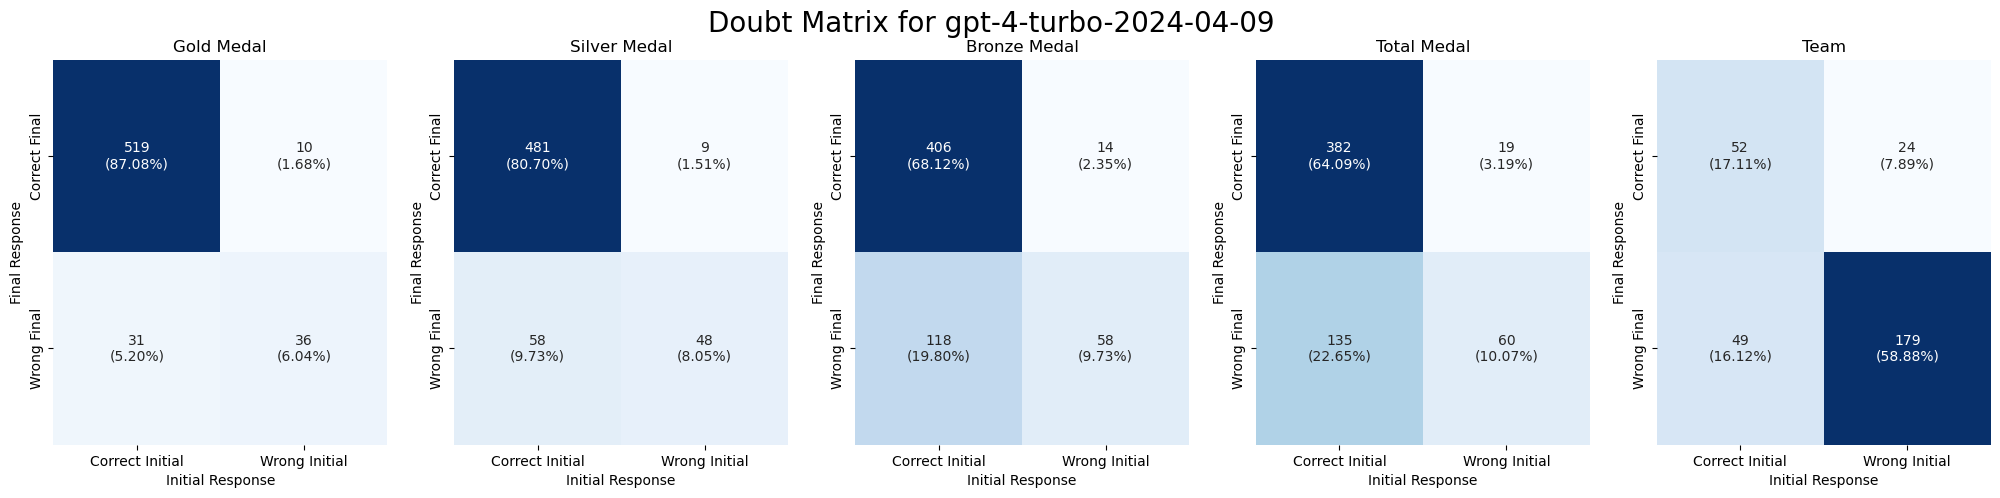

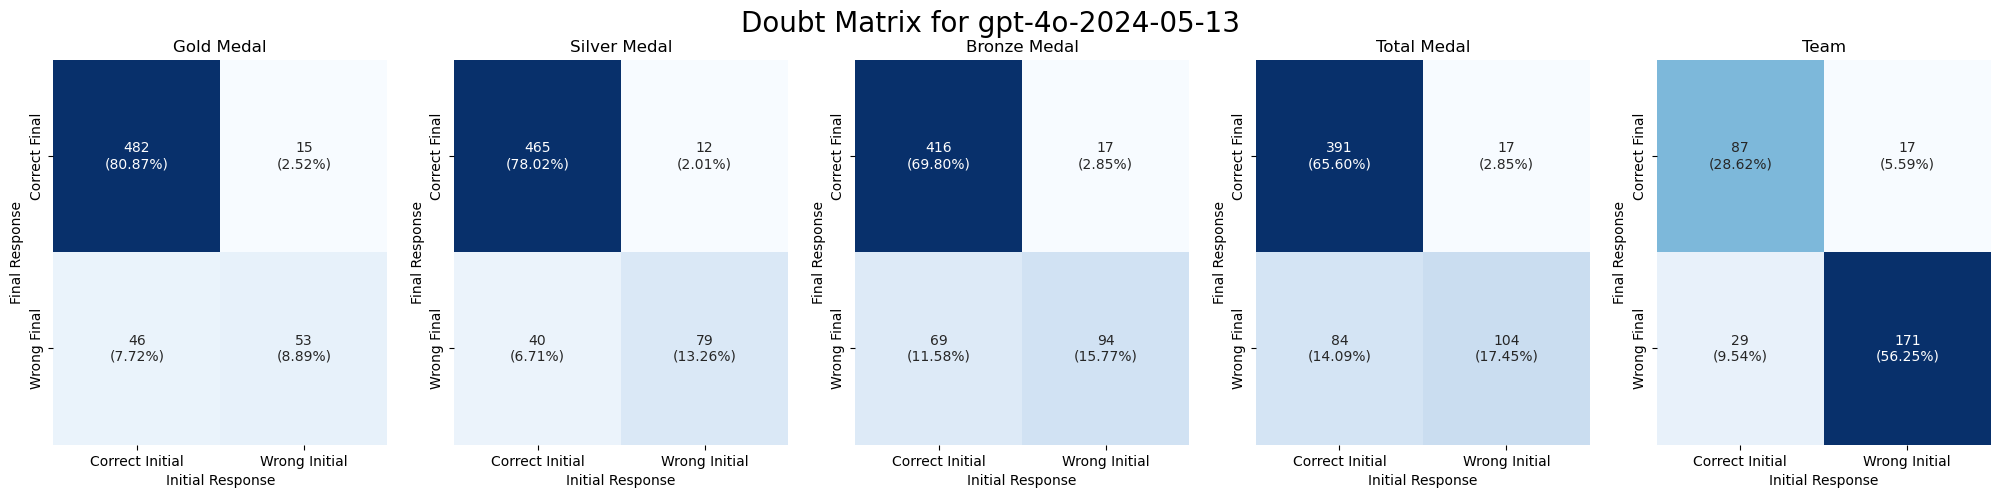

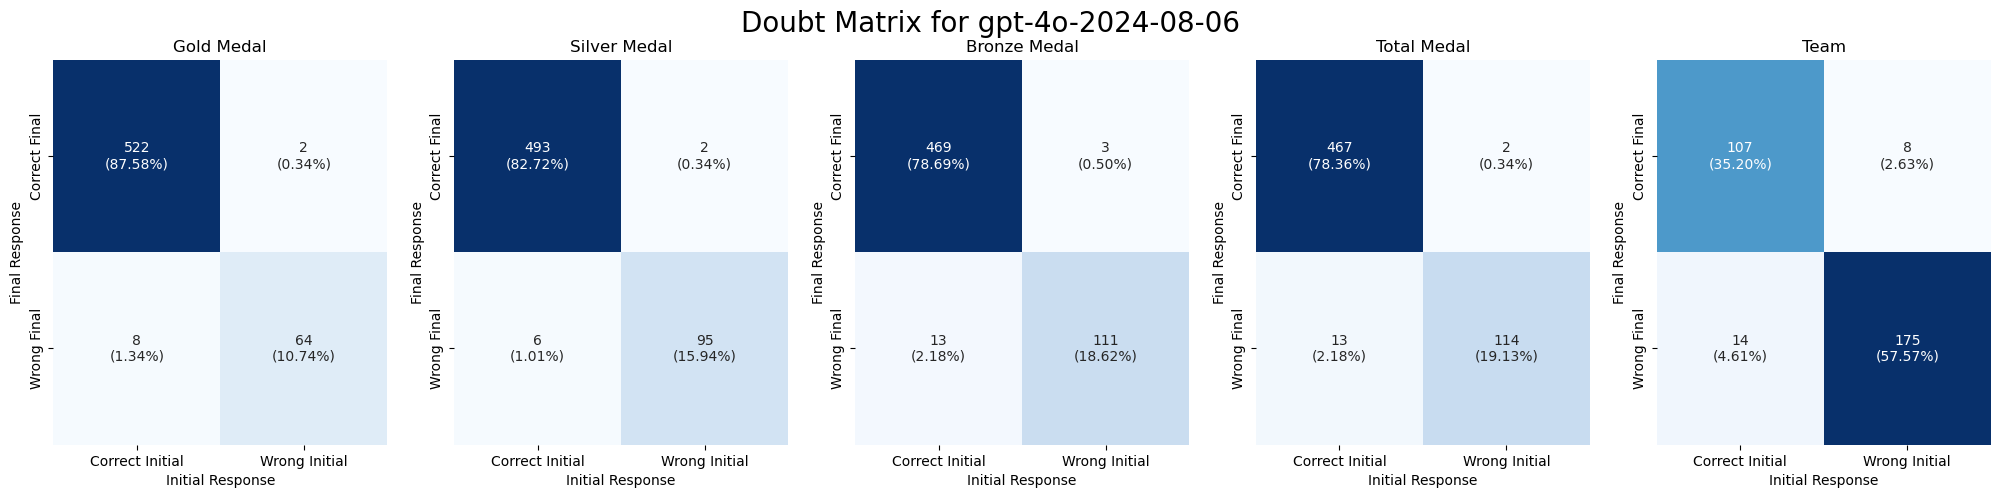

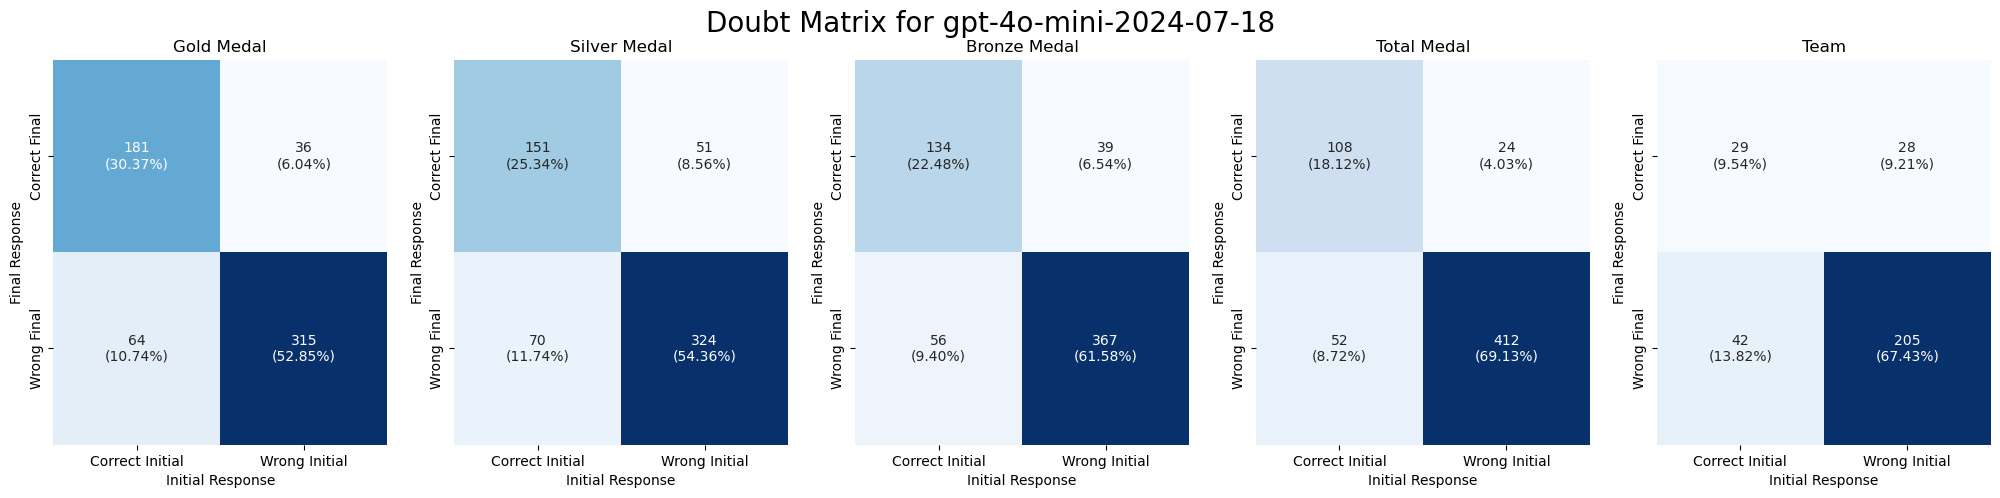

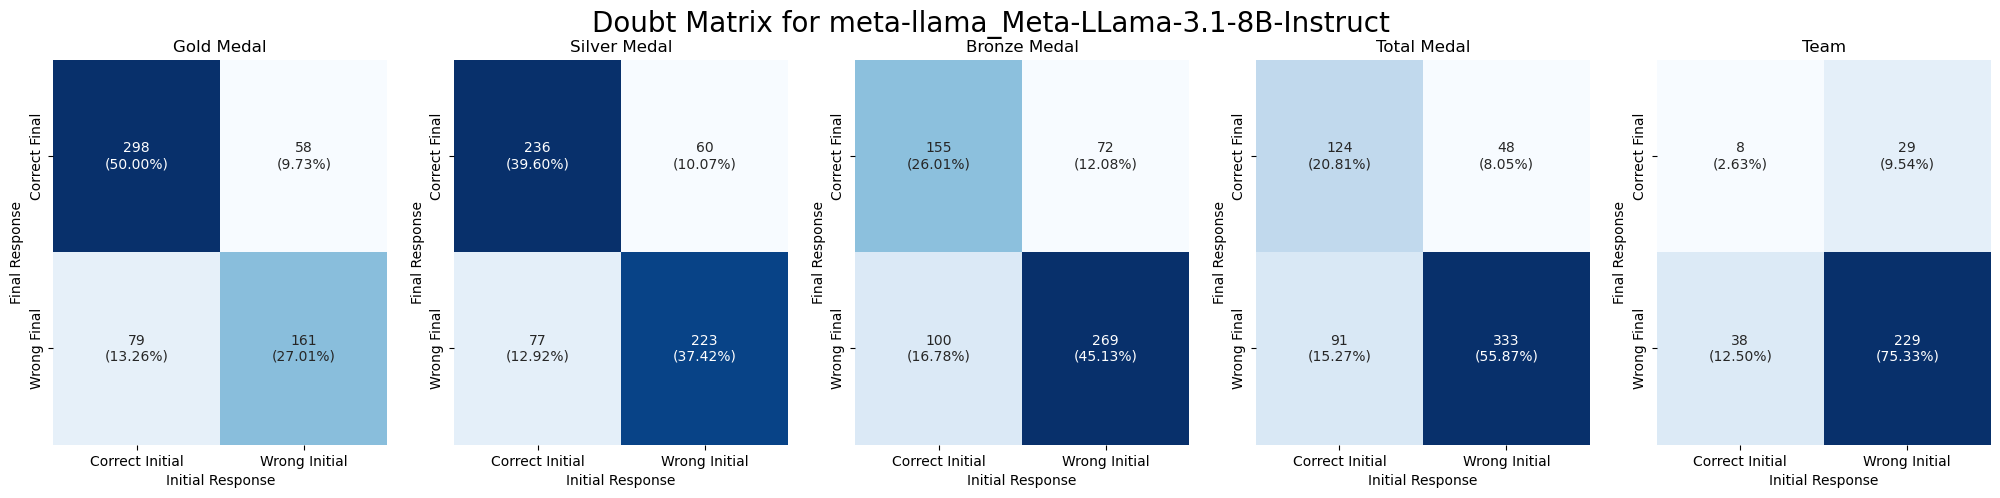

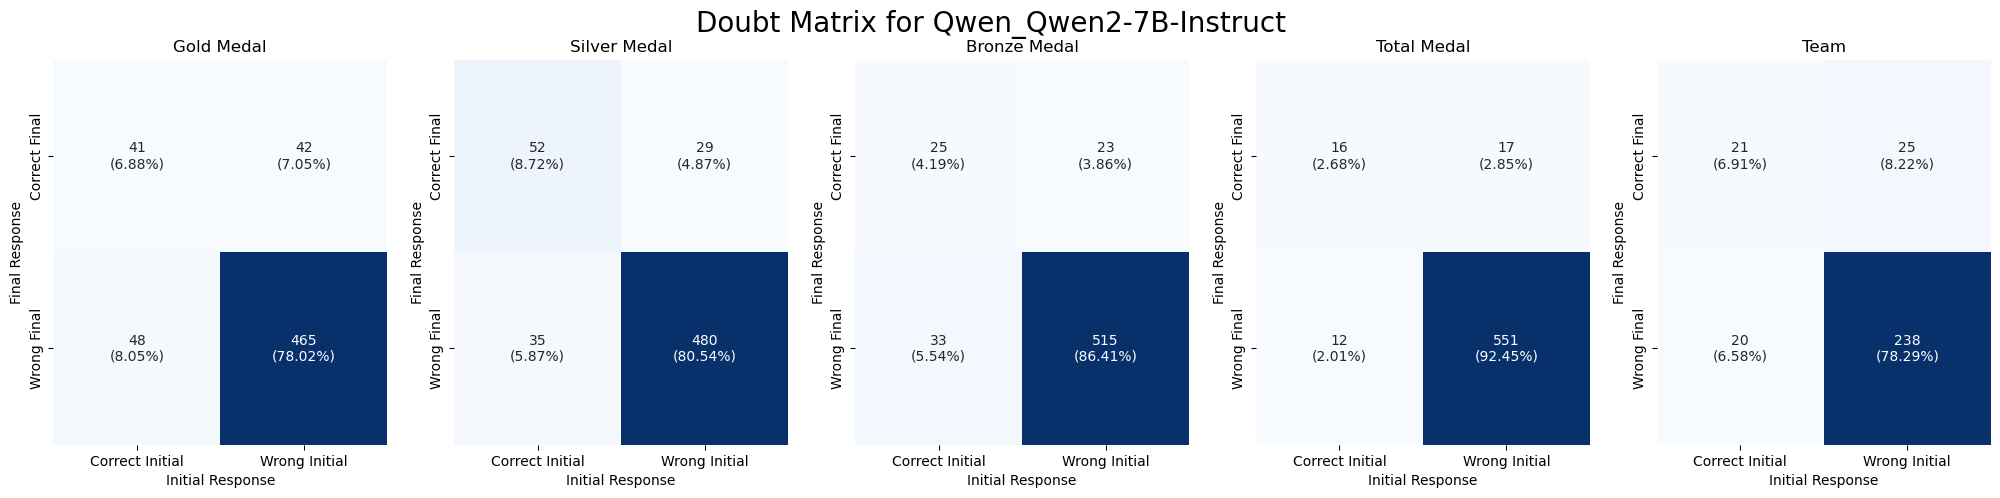

In [13]:
model_list = [
    'claude-3-5-sonnet-20240620',
    'claude-3-haiku-20240307',
    'gemini-1.5-flash-001',
    'gemini-1.5-pro-001',
    'google_gemma-2-9b-it',
    'gpt-3.5-turbo-0125',
    'gpt-4-turbo-2024-04-09',
    'gpt-4o-2024-05-13',
    'gpt-4o-2024-08-06',
    'gpt-4o-mini-2024-07-18',
    'meta-llama_Meta-LLama-3.1-8B-Instruct',
    'Qwen_Qwen2-7B-Instruct'
]

for model_name in model_list:
    draw_matrix(model_name)